<a href="https://colab.research.google.com/github/AvaCook/cs315/blob/main/selectionPoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Template for testing Selection Sort on small lists, outputing each intermediate step

In [1]:
import random
import time
import matplotlib.pyplot as plt

In [5]:

# Selection sort implementation
def selection(A, print_flag=False):
    n = len(A)
    for i in range(n-1):
        smallest = i
        for j in range(i+1, n):
            if A[smallest] > A[j]:
                smallest = j
        A[i], A[smallest] = A[smallest], A[i]
        if print_flag:
            print(f"Step {i+1}: {A}")
    return A

# Generate random list
def generate_random_list(n):
    return [random.randint(1, 1000000) for _ in range(n)]

# Timing wrapper
def time_algorithm(algorithm, arr):
    start = time.time()
    algorithm(arr.copy())   # use copy so input stays same
    end = time.time()
    return end - start

# Test sizes for Selection Sort (quadratic time, so keep modest)
Ns = [500, 1000, 2000, 4000, 8000]
times = []

for n in Ns:
    arr = generate_random_list(n)
    t = time_algorithm(selection, arr)
    times.append(t)




N values: [500, 1000, 2000, 4000, 8000]
Times: [0.005905866622924805, 0.025733232498168945, 0.09615135192871094, 0.4203975200653076, 4.7449867725372314]
Ratios (T(2n)/T(n)): [4.357232247386056, 3.7364661410319364, 4.372247624526393, 11.286904765280514]


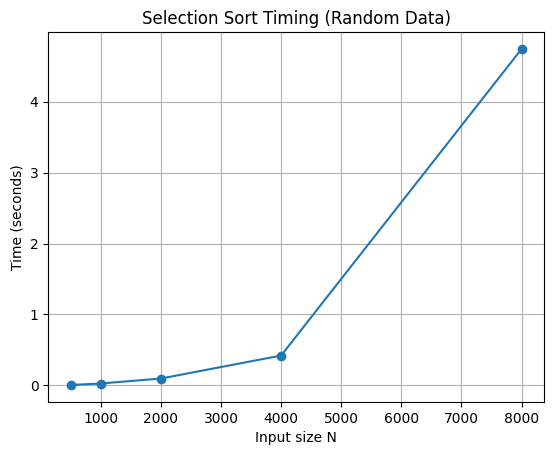

In [4]:
# Print results
print("N values:", Ns)
print("Times:", times)

# Ratio Test (expected ~4 since O(n^2))
ratios = []
for i in range(1, len(times)):
    ratios.append(times[i] / times[i-1])
print("Ratios (T(2n)/T(n)):", ratios)

# Plot
plt.plot(Ns, times, marker='o')
plt.xlabel('Input size N')
plt.ylabel('Time (seconds)')
plt.title('Selection Sort Timing (Random Data)')
plt.grid(True)
plt.show()